# Jamie's Fun Lil' Data Science Diary

### Questions:

* What is an indicator of pneumonia and why?
    * Viral pneumonia on the X-ray is characterized by such a pattern as Ground-glass opacity. Bacterial pneumonia has clear areas of opacity. In our dataset, we have a lot of people with pneumonia.
    * What's the difference between viral and bacterial and why do they look different on the scans?
    * How are we gonna deal with class imbalance?
    * How do we distinguish between viral and bacterial images (python-wise)?
    
* Are computers already being used to do this work for doctors?

* Facts/figures
    * Pneumonia is the world's leading killer of children under 5
    
* How can we verify the safety of using these models as opposed to experts? Have there been instances where the model was right and the expert was wrong?

###### Create an interface which shows what the computer is able to detect, for every layer

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.ndimage import zoom
import pandas as pd
from PIL import Image as im
from keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import tensorflow as tf

In [5]:
import os

In [6]:
# Source Code: https://www.kaggle.com/dmitriyveselov/first-simple-keras-cnn-88-90-accuracy-chest-xray

train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')
train_normal=os.listdir('../data/chest_xray/train/NORMAL/')
test_normal=os.listdir('../data/chest_xray/test/NORMAL/')
test_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')

In [7]:
train_bacterial=os.listdir('../data/chest_xray/chest_xray_ternary/train/BACTERIAL')
train_viral=os.listdir('../data/chest_xray/chest_xray_ternary/train/VIRAL')
train_tern_normal=os.listdir('../data/chest_xray/chest_xray_ternary/train/NORMAL')
test_tern_normal=os.listdir('../data/chest_xray/chest_xray_ternary/test/NORMAL')
test_bacterial=os.listdir('../data/chest_xray/chest_xray_ternary/test/BACTERIAL')
test_viral=os.listdir('../data/chest_xray/chest_xray_ternary/test/VIRAL')

In [9]:
len(train_tern_normal)

1349

In [10]:
len(train_normal)

1350

In [92]:
len(train_bacterial)+len(train_viral)+len(train_tern_normal)

5232

In [93]:
len(test_tern_normal)+len(test_bacterial)+len(test_viral)

624

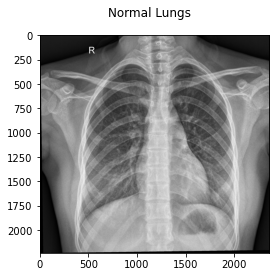

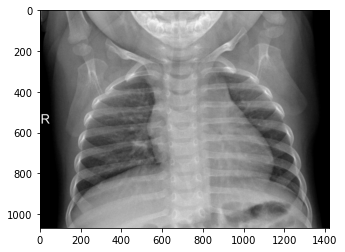

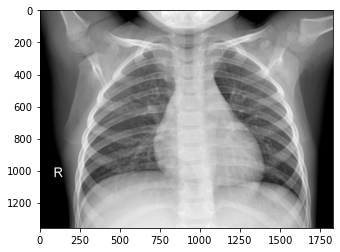

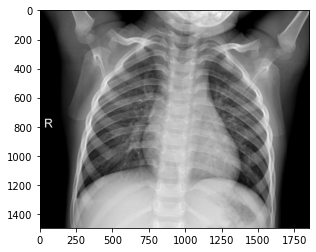

In [6]:
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

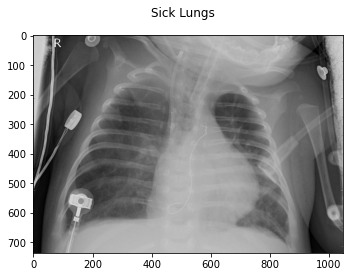

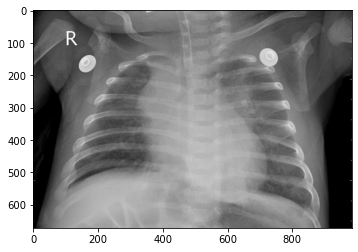

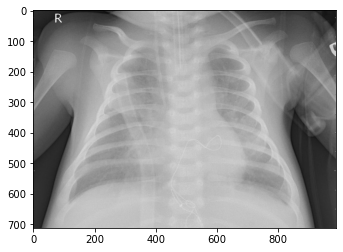

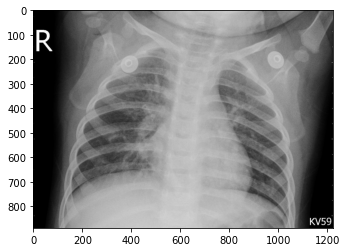

In [6]:
plt.suptitle('Sick Lungs')
for i in range(0,4):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    plt.imshow(img)
    plt.show()

<AxesSubplot:>

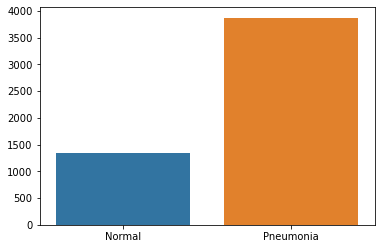

In [17]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneumonia)])

In [7]:
pneumonia_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.4,
                                   zoom_range=0.4
                                 )

In [7]:
normal_img_arrays = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[:,:,0]
    normal_img_arrays.append(array)

In [8]:
pneumonia_img_arrays = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[:,:,0]
    pneumonia_img_arrays.append(array)

In [54]:
normal_tern_arrays = []

for i in range(len(train_tern_normal)):
    img = train_tern_normal[i]
    img = load_img('../data/chest_xray/chest_xray_ternary/train/NORMAL/' + img)
    array = np.array(img)
    normal_tern_arrays.append(array)

In [58]:
bacterial_arrays = []

for i in range(len(train_bacterial)):
    img = train_bacterial[i]
    img = load_img('../data/chest_xray/chest_xray_ternary/train/PNEUMONIA/BACTERIAL/' + img)
    array = np.array(img)
    bacterial_arrays.append(array)

In [60]:
viral_arrays = []

for i in range(len(train_viral)):
    img = train_viral[i]
    img = load_img('../data/chest_xray/chest_xray_ternary/train/PNEUMONIA/VIRAL/' + img)
    array = np.array(img)
    viral_arrays.append(array)

In [62]:
norm_tern_sums = []

for array in normal_tern_arrays:
    norm_tern_sums.append(array.sum())

In [63]:
bact_tern_sums = []

for array in bacterial_arrays:
    bact_tern_sums.append(array.sum())

In [64]:
viral_sums = []

for array in viral_arrays:
    viral_sums.append(array.sum())

Text(0.5, 1.0, 'Comparing Distribution of Grayscale Sums')

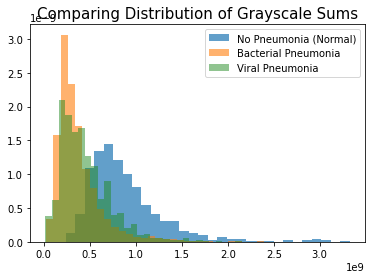

In [68]:
plt.hist(norm_tern_sums, density=True, bins=30, label='No Pneumonia (Normal)', alpha=.7)
plt.hist(bact_tern_sums, density=True, bins=30, label='Bacterial Pneumonia', alpha=0.6)
plt.hist(viral_sums, density=True, bins=30, color='forestgreen', label='Viral Pneumonia', alpha=0.5)

plt.legend()
plt.title('Comparing Distribution of Grayscale Sums', size=15)

In [117]:
# from regular train normal
gs_sums = []

for array in normal_img_arrays:
    gs_sums.append(array.sum())
    

In [118]:
# from regular train pneumonia
gs_sums_p = []

for array in pneumonia_img_arrays:
    gs_sums_p.append(array.sum())

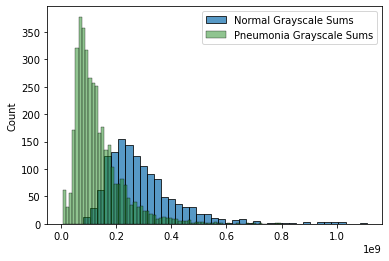

In [119]:
sns.histplot(x=gs_sums, label='Normal Grayscale Sums')
sns.histplot(x=gs_sums_p, color='forestgreen', alpha=0.5, label='Pneumonia Grayscale Sums')
plt.legend()

In [110]:
pneumonia_img_arrays[3][:,:,0].sum()

132158485

In [111]:
pneumonia_img_arrays[3][:,:,1].sum()

132158485

In [112]:
pneumonia_img_arrays[3][:,:,2].sum()

132158485

In [9]:
normal_img_sliced = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[400:2000, 400:2000,0]
    normal_img_arrays.append(array)

In [10]:
pneumonia_img_sliced = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[400:2000, 400:2000,0]
    pneumonia_img_arrays.append(array)

In [6]:
normal_resized = []
normal_res_arrays = []

for image in train_normal:
    img = im.open('../data/chest_xray/train/NORMAL/'+image)
    img = img.resize((400,400))
    normal_resized.append(img)
    normal_res_arrays.append(np.array(img))

In [7]:
pneumonia_resized = []
pneumonia_res_arrays = []

for image in train_pneumonia:
    img = im.open('../data/chest_xray/train/PNEUMONIA/'+image)
    img = img.resize((400,400))
    pneumonia_resized.append(img)
    pneumonia_res_arrays.append(np.array(img))

### Moving images - Rachel

##### Graphing Distribution of Grayscale Sums

In [6]:
gs_sums = []

for array in normal_img_arrays:
    gs_sums.append(array.sum())

NameError: name 'normal_img_arrays' is not defined

In [40]:
gs_sums_p = []

for array in pneumonia_img_arrays:
    gs_sums_p.append(array.sum())

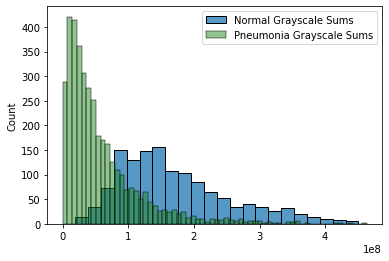

In [41]:
# Sliced histplot
sns.histplot(x=gs_sums, label='Normal Grayscale Sums')
sns.histplot(x=gs_sums_p, color='forestgreen', alpha=0.5, label='Pneumonia Grayscale Sums')
plt.legend()

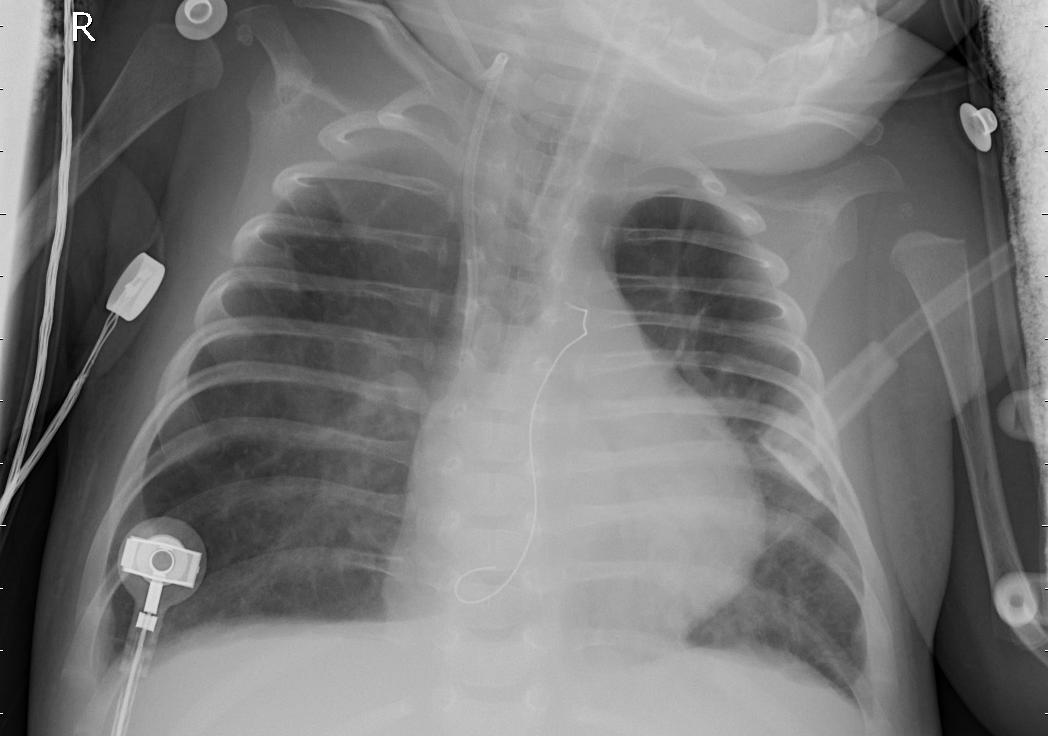

In [10]:
# first sick patient image
img = train_pneumonia[0]
img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
img

In [24]:
zoomed_normal = zoom(normal_img_arrays[0], zoom=0.2)

In [27]:
normal_img_arrays[0].shape

(2234, 2359)

In [34]:
sliced = normal_img_arrays[0][400:2000, 400:2000]

In [35]:
zoomed_img = im.fromarray(sliced)

#### Preprocessing

In [79]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   vertical_flip=True, # may change to false....don't think this would be useful??
                                   rotation_range=0.4,
                                   zoom_range=0.4
                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                                 target_size=(224, 224),
                                                 batch_size=50,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('../data/chest_xray/val/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=50,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                            target_size=(224, 224),
                                            batch_size=50,
                                            class_mode='binary')

Found 5232 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '../data/chest_xray/val/'

#### FSM 

In [ ]:
model = Sequential()

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])


In [179]:
from keras.layers import Dense, Dropout, Flatten

In [45]:
model.add(Flatten())

In [51]:
def slice_preprocessed_array():
    '''
    Takes in the set of image matrices and slices them to only contain the actual lung (area of import).
    '''
    return None

In [47]:
len(training_set[0])

2

In [49]:
len(training_set[0][0])

50

In [48]:
len(training_set)

105

In [46]:
training_set[0][0][0].shape

(224, 224, 3)

In [54]:
training_set[1][0][0].shape

(224, 224, 3)

In [55]:
training_set[1][1][0].shape

()

In [53]:
test_set[0][0].shape

(50, 224, 224, 3)

In [47]:
# fitting
history = model.fit_generator(training_set,
                    epochs=10,
                    validation_data=test_set)

Epoch 1/10
105/105 [==============================] - 182s 2s/step - loss: 1.2972 - categorical_accuracy: 0.0037 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
105/105 [==============================] - 178s 2s/step - loss: 1.2799 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
105/105 [==============================] - 193s 2s/step - loss: 1.3062 - categorical_accuracy: 9.3743e-04 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
105/105 [==============================] - 190s 2s/step - loss: 1.2947 - categorical_accuracy: 0.0014 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
105/105 [==============================] - 175s 2s/step - loss: 1.2670 - categorical_accuracy: 0.0026 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
105/105 [==============================] - 176s 2s/step - loss: 1.2883 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_cat

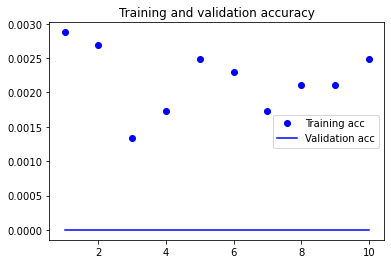

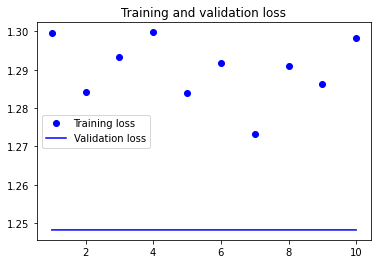

In [49]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss'
        )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [8]:
norms = pd.DataFrame(normal_resized)

In [9]:
norms['target'] = 0

In [10]:
sick = pd.DataFrame(pneumonia_resized)

In [11]:
sick['target'] = 1

In [12]:
df = pd.concat([norms, sick])

In [13]:
len(df)

5216

In [14]:
df.head()

,0,target
0,<PIL.Image.Image image mode=L size=400x400 at ...,0
1,<PIL.Image.Image image mode=L size=400x400 at ...,0
2,<PIL.Image.Image image mode=L size=400x400 at ...,0
3,<PIL.Image.Image image mode=L size=400x400 at ...,0
4,<PIL.Image.Image image mode=L size=400x400 at ...,0


In [15]:
df.target.value_counts()

1    3875
0    1341
Name: target, dtype: int64

In [16]:
X_pre = np.array(df[0])
y = np.array(df['target'])

In [17]:
type(X_pre[14])

PIL.Image.Image

In [18]:
X = np.zeros(shape=(5216,400,400,1), dtype=float)

In [20]:
y.shape

(5216,)

In [21]:
X_pre.shape

(5216,)

In [22]:
np.array(X_pre[1165]).shape

(400, 400)

In [137]:
for i in range(len(X_pre)):
    if np.array(X_pre[i]).shape != (400,400):
        print('not right shape at index',i, np.array(X_pre[i]).shape)

not right shape at index 0 (400, 400, 1)
not right shape at index 1 (400, 400, 1)
not right shape at index 2 (400, 400, 1)
not right shape at index 3 (400, 400, 1)
not right shape at index 4 (400, 400, 1)
not right shape at index 5 (400, 400, 1)
not right shape at index 6 (400, 400, 1)
not right shape at index 7 (400, 400, 1)
not right shape at index 8 (400, 400, 1)
not right shape at index 9 (400, 400, 1)
not right shape at index 10 (400, 400, 1)
not right shape at index 11 (400, 400, 1)
not right shape at index 12 (400, 400, 1)
not right shape at index 13 (400, 400, 1)
not right shape at index 14 (400, 400, 1)
not right shape at index 15 (400, 400, 1)
not right shape at index 16 (400, 400, 1)
not right shape at index 17 (400, 400, 1)
not right shape at index 18 (400, 400, 1)
not right shape at index 19 (400, 400, 1)
not right shape at index 20 (400, 400, 1)
not right shape at index 21 (400, 400, 1)
not right shape at index 22 (400, 400, 1)
not right shape at index 23 (400, 400, 1)
no

not right shape at index 403 (400, 400, 1)
not right shape at index 404 (400, 400, 1)
not right shape at index 405 (400, 400, 1)
not right shape at index 406 (400, 400, 1)
not right shape at index 407 (400, 400, 1)
not right shape at index 408 (400, 400, 1)
not right shape at index 409 (400, 400, 1)
not right shape at index 410 (400, 400, 1)
not right shape at index 411 (400, 400, 1)
not right shape at index 412 (400, 400, 1)
not right shape at index 413 (400, 400, 1)
not right shape at index 414 (400, 400, 1)
not right shape at index 415 (400, 400, 1)
not right shape at index 416 (400, 400, 1)
not right shape at index 417 (400, 400, 1)
not right shape at index 418 (400, 400, 1)
not right shape at index 419 (400, 400, 1)
not right shape at index 420 (400, 400, 1)
not right shape at index 421 (400, 400, 1)
not right shape at index 422 (400, 400, 1)
not right shape at index 423 (400, 400, 1)
not right shape at index 424 (400, 400, 1)
not right shape at index 425 (400, 400, 1)
not right s

not right shape at index 709 (400, 400, 1)
not right shape at index 710 (400, 400, 1)
not right shape at index 711 (400, 400, 1)
not right shape at index 712 (400, 400, 1)
not right shape at index 713 (400, 400, 1)
not right shape at index 714 (400, 400, 1)
not right shape at index 715 (400, 400, 1)
not right shape at index 716 (400, 400, 1)
not right shape at index 717 (400, 400, 1)
not right shape at index 718 (400, 400, 1)
not right shape at index 719 (400, 400, 1)
not right shape at index 720 (400, 400, 1)
not right shape at index 721 (400, 400, 1)
not right shape at index 722 (400, 400, 1)
not right shape at index 723 (400, 400, 1)
not right shape at index 724 (400, 400, 1)
not right shape at index 725 (400, 400, 1)
not right shape at index 726 (400, 400, 1)
not right shape at index 727 (400, 400, 1)
not right shape at index 728 (400, 400, 1)
not right shape at index 729 (400, 400, 1)
not right shape at index 730 (400, 400, 1)
not right shape at index 731 (400, 400, 1)
not right s

not right shape at index 942 (400, 400, 1)
not right shape at index 943 (400, 400, 1)
not right shape at index 944 (400, 400, 1)
not right shape at index 945 (400, 400, 1)
not right shape at index 946 (400, 400, 1)
not right shape at index 947 (400, 400, 1)
not right shape at index 948 (400, 400, 1)
not right shape at index 949 (400, 400, 1)
not right shape at index 950 (400, 400, 1)
not right shape at index 951 (400, 400, 1)
not right shape at index 952 (400, 400, 1)
not right shape at index 953 (400, 400, 1)
not right shape at index 954 (400, 400, 1)
not right shape at index 955 (400, 400, 1)
not right shape at index 956 (400, 400, 1)
not right shape at index 957 (400, 400, 1)
not right shape at index 958 (400, 400, 1)
not right shape at index 959 (400, 400, 1)
not right shape at index 960 (400, 400, 1)
not right shape at index 961 (400, 400, 1)
not right shape at index 962 (400, 400, 1)
not right shape at index 963 (400, 400, 1)
not right shape at index 964 (400, 400, 1)
not right s

not right shape at index 1179 (400, 400, 1)
not right shape at index 1180 (400, 400, 1)
not right shape at index 1181 (400, 400, 1)
not right shape at index 1182 (400, 400, 1)
not right shape at index 1183 (400, 400, 1)
not right shape at index 1184 (400, 400, 1)
not right shape at index 1185 (400, 400, 1)
not right shape at index 1186 (400, 400, 1)
not right shape at index 1187 (400, 400, 1)
not right shape at index 1188 (400, 400, 1)
not right shape at index 1189 (400, 400, 1)
not right shape at index 1190 (400, 400, 1)
not right shape at index 1191 (400, 400, 1)
not right shape at index 1192 (400, 400, 1)
not right shape at index 1193 (400, 400, 1)
not right shape at index 1194 (400, 400, 1)
not right shape at index 1195 (400, 400, 1)
not right shape at index 1196 (400, 400, 1)
not right shape at index 1197 (400, 400, 1)
not right shape at index 1198 (400, 400, 1)
not right shape at index 1199 (400, 400, 1)
not right shape at index 1200 (400, 400, 1)
not right shape at index 1201 (4

not right shape at index 1490 (400, 400, 3)
not right shape at index 1496 (400, 400, 3)
not right shape at index 1507 (400, 400, 3)
not right shape at index 1530 (400, 400, 3)
not right shape at index 1546 (400, 400, 3)
not right shape at index 1548 (400, 400, 3)
not right shape at index 1550 (400, 400, 3)
not right shape at index 1588 (400, 400, 3)
not right shape at index 1606 (400, 400, 3)
not right shape at index 1607 (400, 400, 3)
not right shape at index 1616 (400, 400, 3)
not right shape at index 1628 (400, 400, 3)
not right shape at index 1639 (400, 400, 3)
not right shape at index 1659 (400, 400, 3)
not right shape at index 1670 (400, 400, 3)
not right shape at index 1685 (400, 400, 3)
not right shape at index 1695 (400, 400, 3)
not right shape at index 1699 (400, 400, 3)
not right shape at index 1705 (400, 400, 3)
not right shape at index 1726 (400, 400, 3)
not right shape at index 1731 (400, 400, 3)
not right shape at index 1790 (400, 400, 3)
not right shape at index 1802 (4

not right shape at index 4199 (400, 400, 3)
not right shape at index 4227 (400, 400, 3)
not right shape at index 4238 (400, 400, 3)
not right shape at index 4246 (400, 400, 3)
not right shape at index 4251 (400, 400, 3)
not right shape at index 4260 (400, 400, 3)
not right shape at index 4261 (400, 400, 3)
not right shape at index 4263 (400, 400, 3)
not right shape at index 4284 (400, 400, 3)
not right shape at index 4286 (400, 400, 3)
not right shape at index 4308 (400, 400, 3)
not right shape at index 4310 (400, 400, 3)
not right shape at index 4321 (400, 400, 3)
not right shape at index 4326 (400, 400, 3)
not right shape at index 4343 (400, 400, 3)
not right shape at index 4365 (400, 400, 3)
not right shape at index 4381 (400, 400, 3)
not right shape at index 4384 (400, 400, 3)
not right shape at index 4398 (400, 400, 3)
not right shape at index 4406 (400, 400, 3)
not right shape at index 4411 (400, 400, 3)
not right shape at index 4417 (400, 400, 3)
not right shape at index 4427 (4

In [133]:
np.array(X_pre[0]).shape

(400, 400)

In [134]:
X.shape

(5216, 400, 400, 1)

In [162]:
X[0].shape

(400, 400, 1)

In [23]:
for i in range(len(X)):
    if np.array(X_pre[i]).shape  == (400,400):
        X[i] = np.array(X_pre[i]).reshape(400,400,1)
    elif np.array(X_pre[i]).shape == (400,400,1):
        X[i] = np.array(X_pre[i])
    elif np.array(X_pre[i]).shape == (400,400,3):
        X[i] = np.array(X_pre[i])[:,:,0].reshape(400,400,1)
    else:
        print(f"At index {i} we have an array of shape:",np.array(X_pre[i]).shape)

In [24]:
X.shape

(5216, 400, 400, 1)

In [25]:
for i in range(len(X)):
    X[i] = X[i] / 255

In [27]:
X[200].shape

(400, 400, 1)

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [47]:
# Using X and y
model = Sequential()

In [48]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 398, 398, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1267232)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1267233   
Total params: 1,267,553
Trainable params: 1,267,553
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
X[0,0,0].dtype

dtype('float64')

In [52]:
model.fit(X, y.astype('float32').reshape((-1,1)), epochs=10, batch_size=50, shuffle=True)

Epoch 1/10
105/105 [==============================] - 901s 8s/step - loss: 5.8287 - accuracy: 0.7518
Epoch 2/10
105/105 [==============================] - 1001s 10s/step - loss: 0.1779 - accuracy: 0.7424
Epoch 3/10
105/105 [==============================] - 1080s 10s/step - loss: 0.1587 - accuracy: 0.7375
Epoch 4/10
105/105 [==============================] - 3127s 30s/step - loss: 0.0755 - accuracy: 0.7477
Epoch 5/10
105/105 [==============================] - 998s 10s/step - loss: 0.0708 - accuracy: 0.7514
Epoch 6/10
105/105 [==============================] - 1055s 10s/step - loss: 0.0722 - accuracy: 0.7469
Epoch 7/10
105/105 [==============================] - 1031s 10s/step - loss: 0.0395 - accuracy: 0.7382
Epoch 8/10
105/105 [==============================] - 1212s 12s/step - loss: 0.0391 - accuracy: 0.7430
Epoch 9/10
105/105 [==============================] - 1144s 11s/step - loss: 0.0312 - accuracy: 0.7387
Epoch 10/10
105/105 [==============================] - 1242s 12s/step - loss

In [54]:
normal_res_test = []

for image in test_dir_normal:
    img = im.open('../data/chest_xray/test/NORMAL/'+image)
    img = img.resize((400,400))
    normal_res_test.append(img)

In [55]:
sick_res_test = []

for image in test_dir_pneumonia:
    img = im.open('../data/chest_xray/test/PNEUMONIA/'+image)
    img = img.resize((400,400))
    sick_res_test.append(img)

In [57]:
norm_test = pd.DataFrame(normal_res_test)

norm_test['target'] = 0

sick_test = pd.DataFrame(sick_res_test)

sick_test['target'] = 1

df_test = pd.concat([norm_test, sick_test])

In [58]:
df_test.target.value_counts()

1    390
0    234
Name: target, dtype: int64

In [63]:
X_test_pre = np.array(df_test[0])
test_labels = np.array(df_test['target'])

In [64]:
type(X_test_pre[14])

PIL.Image.Image

In [65]:
X_test = np.zeros(shape=(len(df_test),400,400,1), dtype=float)

In [66]:
test_labels.shape

(624,)

In [67]:
X_test.shape

(624, 400, 400, 1)

In [68]:
X_test_pre.shape

(624,)

In [69]:
np.array(X_pre[1165]).shape

(400, 400)

In [70]:
for i in range(len(X_test)):
    if np.array(X_test_pre[i]).shape  == (400,400):
        X_test[i] = np.array(X_test_pre[i]).reshape(400,400,1)
    elif np.array(X_test_pre[i]).shape == (400,400,1):
        X_test[i] = np.array(X_test_pre[i])
    elif np.array(X_test_pre[i]).shape == (400,400,3):
        X_test[i] = np.array(X_test_pre[i])[:,:,0].reshape(400,400,1)
    else:
        print(f"At index {i} we have an array of shape:",np.array(X_test_pre[i]).shape)

In [72]:
for i in range(len(X_test)):
    X_test[i] = X_test[i] / 255

In [76]:
test_loss, test_acc = model.evaluate(X_test, test_labels.reshape((-1,1)))

20/20 [==============================] - 23s 832ms/step - loss: 0.9411 - accuracy: 0.6250


In [77]:
test_loss

0.9410929679870605

In [78]:
test_acc

0.625

In [85]:
model.count_params()

1267553

In [87]:
model.layers[0]

In [89]:
# Will be good for comparing models
# model.variables

In [91]:
# model.call() 
# What can we use this for?

In [92]:
# model.get_losses_for, get_updates_for
# model.from_config() CAN THIS BE USED FOR TRANSFER LEARNING???

In [96]:
predictions = model.predict(X_test)

In [97]:
predictions.shape

(624, 1)

In [101]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

In [104]:
confusion_matrix(test_labels, predictions)

array([[  0, 234],
       [  0, 390]])

In [103]:
print(f'RECALL SCORE: {recall_score(test_labels, predictions)}\n\nACCURACY SCORE: {accuracy_score(test_labels, predictions)}')

RECALL SCORE: 1.0

ACCURACY SCORE: 0.625


In [107]:
model.history.on_epoch_begin

<bound method Callback.on_epoch_begin of <tensorflow.python.keras.callbacks.History object at 0x7f819bdcb4c0>>

In [108]:
# class_weight:  
#     Optional dictionary mapping class indices (integers) to a weight (float) value, 
#     used for weighting the loss function (during training only). 
#     This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

# TRY THIS

In [35]:
model.history.__dict__

NameError: name 'model' is not defined

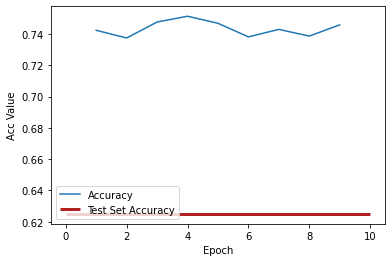

In [117]:
accs = [0.7424, 0.7375, 0.7477, 0.7514, 0.7469, 0.7382, 0.7430, 0.7387, 0.7459]
losses = [0.1779, 0.1587, 0.0755, 0.0708, 0.0722,  0.0395, 0.0391, 0.0312, 0.0249]

epochs = [i for i in range(1,10)]

plt.plot(epochs, accs, label='Accuracy')
plt.hlines(y=test_acc, xmin=0, xmax=10, label='Test Set Accuracy', color='firebrick', lw=3)
plt.xlabel('Epoch')
plt.ylabel('Acc Value')
plt.legend()

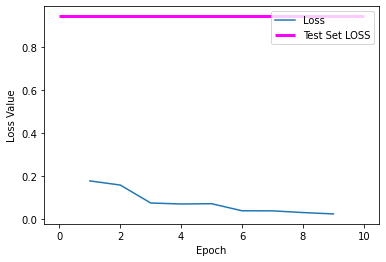

In [116]:
plt.plot(epochs, losses, label="Loss")
plt.hlines(y=test_loss, xmin=0, xmax=10,label='Test Set LOSS', color='magenta', lw=3)
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()